In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('fake_job_postings.csv')

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
job_id,17880.0,8940.500000,5161.655742,1.0,4470.75,8940.5,13410.25,17880.0
telecommuting,17880.0,0.042897,0.202631,0.0,0.00,0.0,0.00,1.0
has_company_logo,17880.0,0.795302,0.403492,0.0,1.00,1.0,1.00,1.0
has_questions,17880.0,0.491723,0.499945,0.0,0.00,0.0,1.00,1.0
fraudulent,17880.0,0.048434,0.214688,0.0,0.00,0.0,0.00,1.0


<AxesSubplot:xlabel='fraudulent', ylabel='count'>

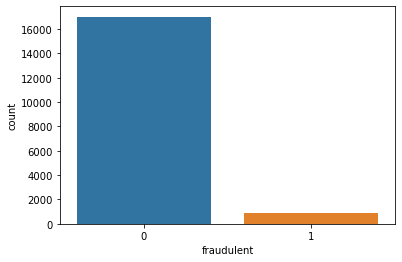

In [6]:
sns.countplot(x='fraudulent',data=df)

In [7]:
# We are dealing with imbalanced data
df.corr()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


<AxesSubplot:>

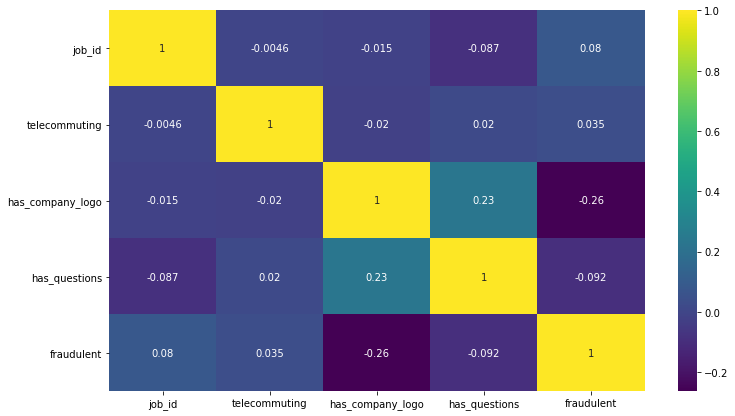

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<AxesSubplot:>

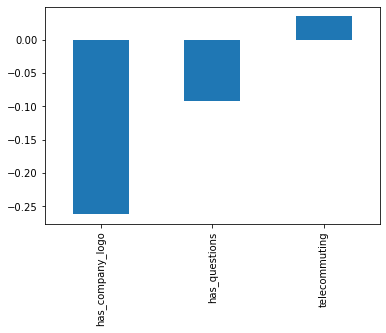

In [9]:
df.corr()['fraudulent'].sort_values().drop(['fraudulent','job_id']).plot(kind='bar')

In [10]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [11]:
100*df.isnull().sum()/len(df)

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [12]:
#There are too many missing values in the above 2 columns
df=df.drop(['location','salary_range'],axis=1)

In [13]:
df.head()

,job_id,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [14]:
df['title'].nunique()

11231

In [15]:
df['department'].nunique()

1337

In [16]:
# There are too many unique elements in the above 2 columns
df=df.drop(['title','department'],axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   company_profile      14572 non-null  object
 2   description          17879 non-null  object
 3   requirements         15185 non-null  object
 4   benefits             10670 non-null  object
 5   telecommuting        17880 non-null  int64 
 6   has_company_logo     17880 non-null  int64 
 7   has_questions        17880 non-null  int64 
 8   employment_type      14409 non-null  object
 9   required_experience  10830 non-null  object
 10  required_education   9775 non-null   object
 11  industry             12977 non-null  object
 12  function             11425 non-null  object
 13  fraudulent           17880 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 1.9+ MB


In [18]:
df.fillna('Not Specified',inplace=True)

In [19]:
df.isnull().sum()

job_id                 0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [20]:
df['required_education'].value_counts()

Not Specified                        8105
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

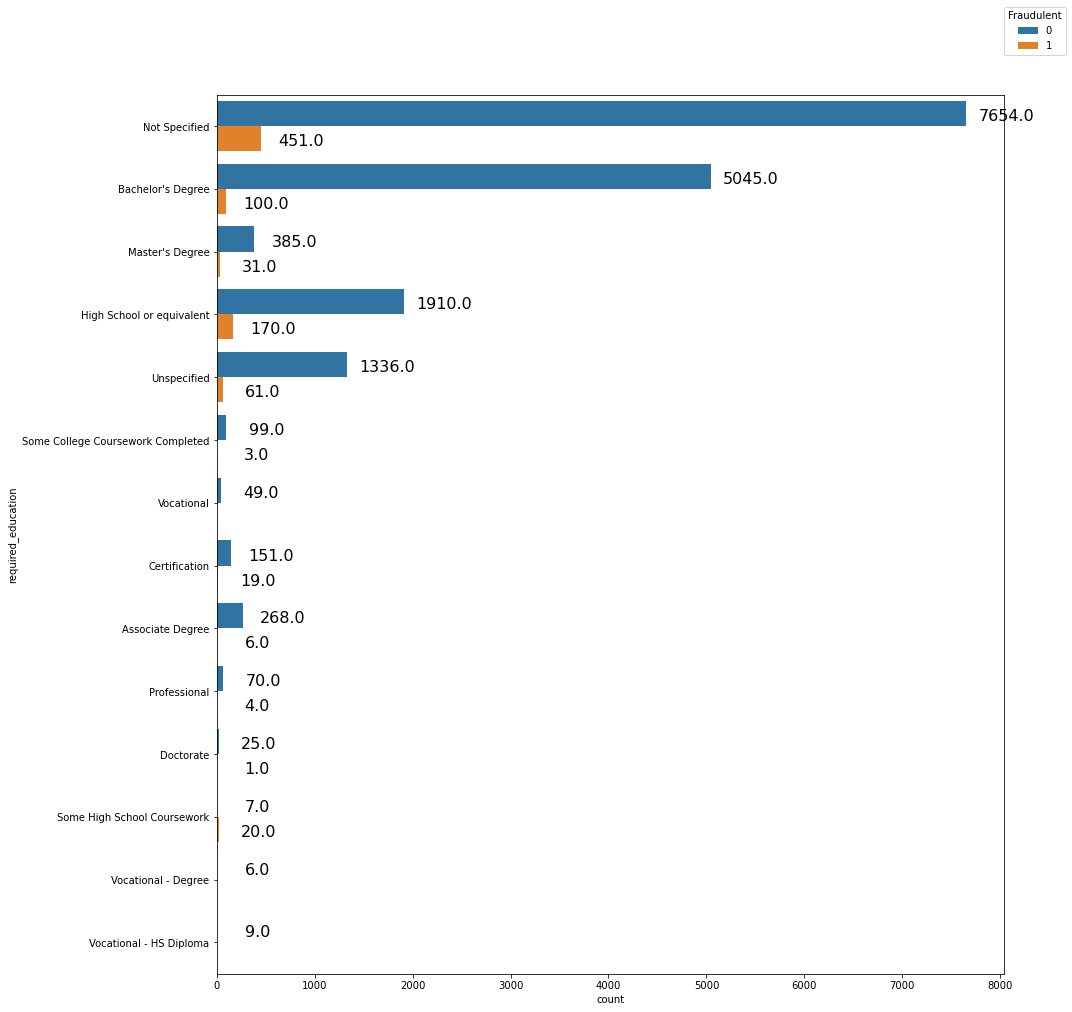

In [22]:
plt.figure(figsize=(15,14))
ax=sns.countplot(y='required_education',hue='fraudulent',data=df)
plt.legend(bbox_to_anchor=(1, 1.1),title='Fraudulent', loc=2, borderaxespad=0.)
plt.tight_layout()
for p in ax.patches:
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(float(width),
                ((x + width), y), 
                xytext = (40, -15),
                fontsize = 16,
                color = '#000000',
                textcoords = 'offset points',
                ha = 'center',
                va = 'center')

In [23]:
req_edu_dummies = pd.get_dummies(df['required_education'],drop_first=True)

In [24]:
df = pd.concat([df.drop('required_education',axis=1),req_edu_dummies],axis=1)

In [25]:
df.columns

Index(['job_id', 'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'industry', 'function', 'fraudulent',
       'Bachelor's Degree', 'Certification', 'Doctorate',
       'High School or equivalent', 'Master's Degree', 'Not Specified',
       'Professional', 'Some College Coursework Completed',
       'Some High School Coursework', 'Unspecified', 'Vocational',
       'Vocational - Degree', 'Vocational - HS Diploma'],
      dtype='object')

In [26]:
df.corr()['fraudulent'].sort_values()

has_company_logo                    -0.261971
has_questions                       -0.091627
Bachelor's Degree                   -0.085854
Vocational                          -0.011827
Some College Coursework Completed   -0.006712
Unspecified                         -0.006467
Vocational - HS Diploma             -0.005063
Vocational - Degree                 -0.004134
Doctorate                           -0.001773
Professional                         0.001688
Master's Degree                      0.018753
Certification                        0.028902
Not Specified                        0.030584
telecommuting                        0.034523
High School or equivalent            0.056274
job_id                               0.079872
Some High School Coursework          0.125409
fraudulent                           1.000000
Name: fraudulent, dtype: float64

In [27]:
df['required_experience'].value_counts()

Not Specified       7050
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

In [28]:
req_exp_dummies = pd.get_dummies(df['required_experience'],drop_first=True)

In [29]:
df = pd.concat([df.drop('required_experience',axis=1),req_exp_dummies],axis=1)

In [30]:
df.columns

Index(['job_id', 'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'industry', 'function', 'fraudulent', 'Bachelor's Degree',
       'Certification', 'Doctorate', 'High School or equivalent',
       'Master's Degree', 'Not Specified', 'Professional',
       'Some College Coursework Completed', 'Some High School Coursework',
       'Unspecified', 'Vocational', 'Vocational - Degree',
       'Vocational - HS Diploma', 'Director', 'Entry level', 'Executive',
       'Internship', 'Mid-Senior level', 'Not Applicable', 'Not Specified'],
      dtype='object')

In [31]:
df.corr()['fraudulent'].sort_values()

has_company_logo                    -0.261971
has_questions                       -0.091627
Bachelor's Degree                   -0.085854
Mid-Senior level                    -0.045483
Internship                          -0.015250
Vocational                          -0.011827
Some College Coursework Completed   -0.006712
Unspecified                         -0.006467
Vocational - HS Diploma             -0.005063
Vocational - Degree                 -0.004134
Director                            -0.003287
Doctorate                           -0.001773
Professional                         0.001688
Not Applicable                       0.006405
Executive                            0.009339
Master's Degree                      0.018753
Certification                        0.028902
Not Specified                        0.030584
telecommuting                        0.034523
Entry level                          0.035212
Not Specified                        0.049865
High School or equivalent         

In [32]:
df['employment_type'].value_counts()

Full-time        11620
Not Specified     3471
Contract          1524
Part-time          797
Temporary          241
Other              227
Name: employment_type, dtype: int64

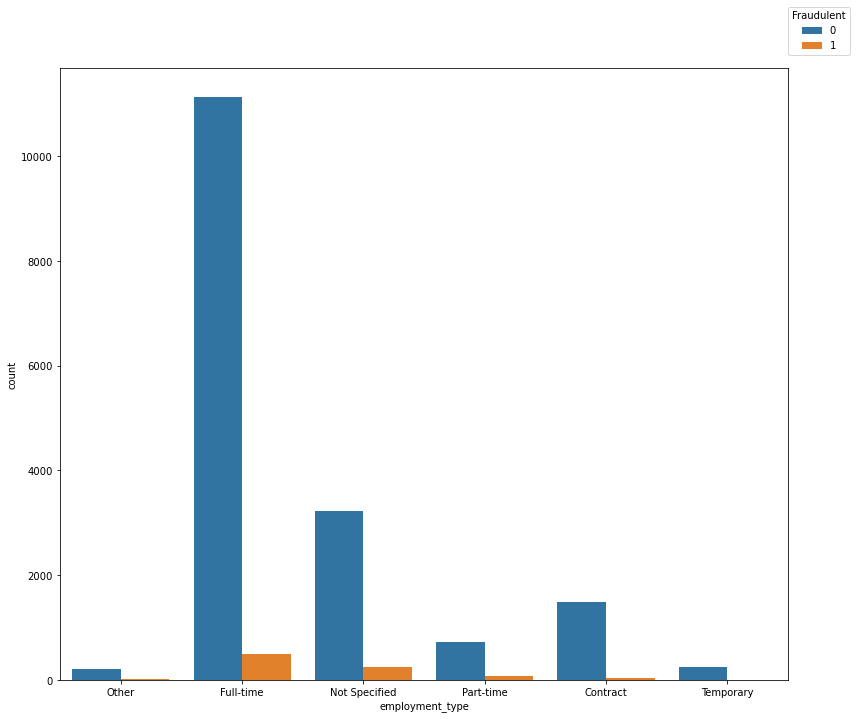

In [33]:
plt.figure(figsize=(12,10))
ax=sns.countplot(x='employment_type',hue='fraudulent',data=df)
plt.legend(bbox_to_anchor=(1, 1.1),title='Fraudulent', loc=2, borderaxespad=0.)
plt.tight_layout()

In [34]:
emp_type_dummies = pd.get_dummies(df['employment_type'],drop_first=True)

In [35]:
df = pd.concat([df.drop('employment_type',axis=1),emp_type_dummies],axis=1)

In [36]:
df.columns

Index(['job_id', 'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'industry',
       'function', 'fraudulent', 'Bachelor's Degree', 'Certification',
       'Doctorate', 'High School or equivalent', 'Master's Degree',
       'Not Specified', 'Professional', 'Some College Coursework Completed',
       'Some High School Coursework', 'Unspecified', 'Vocational',
       'Vocational - Degree', 'Vocational - HS Diploma', 'Director',
       'Entry level', 'Executive', 'Internship', 'Mid-Senior level',
       'Not Applicable', 'Not Specified', 'Full-time', 'Not Specified',
       'Other', 'Part-time', 'Temporary'],
      dtype='object')

In [37]:
df.corr()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,Bachelor's Degree,Certification,Doctorate,High School or equivalent,Master's Degree,...,Executive,Internship,Mid-Senior level,Not Applicable,Not Specified,Full-time,Not Specified,Other,Part-time,Temporary
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872,-0.040463,0.015771,-0.007151,-0.007685,-0.007824,...,-0.004262,-0.009742,0.016665,0.021975,0.003119,0.061553,-0.053655,0.006473,0.014746,-0.001702
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523,-0.029086,-0.009365,-0.008079,0.022189,-0.014365,...,0.034175,0.012722,0.007149,0.029811,-0.052767,-0.035566,-0.005510,0.010508,0.014460,-0.019959
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971,0.127426,-0.025998,-0.006103,0.082909,0.015774,...,-0.009618,0.037425,0.045938,-0.002611,-0.164761,0.027778,-0.062204,0.009244,0.000097,0.023239
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627,0.101833,0.007386,-0.011112,-0.011439,0.033724,...,0.009697,0.026845,0.010664,0.078727,-0.079353,-0.063046,-0.009269,0.034353,0.001679,0.012122
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000,-0.085854,0.028902,-0.001773,0.056274,0.018753,...,0.009339,-0.015250,-0.045483,0.006405,0.049865,-0.039762,0.048007,0.009320,0.044686,-0.021853
Bachelor's Degree,-0.040463,-0.029086,0.127426,0.101833,-0.085854,1.000000,-0.062274,-0.024256,-0.230620,-0.098100,...,0.032720,-0.013374,0.270933,-0.092501,-0.276973,0.177493,-0.299470,-0.031249,-0.097780,-0.033585
Certification,0.015771,-0.009365,-0.025998,0.007386,0.028902,-0.062274,1.000000,-0.003739,-0.035548,-0.015121,...,-0.008735,0.001507,0.010957,0.067634,-0.050746,0.005460,-0.033516,0.004333,0.009557,0.028531
Doctorate,-0.007151,-0.008079,-0.006103,-0.011112,-0.001773,-0.024256,-0.003739,1.000000,-0.013846,-0.005890,...,0.046378,-0.005631,0.019576,-0.009846,-0.027786,0.028009,-0.018730,-0.004327,-0.008243,-0.004461
High School or equivalent,-0.007685,0.022189,0.082909,-0.011439,0.056274,-0.230620,-0.035548,-0.013846,1.000000,-0.055999,...,-0.030376,-0.006429,-0.136374,0.173907,-0.254191,0.064447,-0.119864,0.016504,0.182819,0.001459
Master's Degree,-0.007824,-0.014365,0.015774,0.033724,0.018753,-0.098100,-0.015121,-0.005890,-0.055999,1.000000,...,0.078518,0.010625,0.062865,-0.026019,-0.060754,0.072059,-0.063556,-0.004246,-0.015359,-0.001953


In [38]:
df.head()

,job_id,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,industry,function,...,Executive,Internship,Mid-Senior level,Not Applicable,Not Specified,Full-time,Not Specified,Other,Part-time,Temporary
0,1,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Specified,0,1,0,Not Specified,Marketing,...,0,1,0,0,0,0,0,1,0,0
1,2,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Marketing and Advertising,Customer Service,...,0,0,0,1,0,1,0,0,0,0
2,3,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Specified,0,1,0,Not Specified,Not Specified,...,0,0,0,0,1,0,1,0,0,0
3,4,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Computer Software,Sales,...,0,0,1,0,0,1,0,0,0,0
4,5,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Hospital & Health Care,Health Care Provider,...,0,0,1,0,0,1,0,0,0,0


In [110]:
#We are not going to deal with text columns in this project
#df=df.drop(['job_id','company_profile','description','requirements','benefits'],axis=1)

In [112]:
df.head()

,telecommuting,has_company_logo,has_questions,industry,function,fraudulent,Bachelor's Degree,Certification,Doctorate,High School or equivalent,...,Executive,Internship,Mid-Senior level,Not Applicable,Not Specified,Full-time,Not Specified,Other,Part-time,Temporary
0,0,1,0,Not Specified,Marketing,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,1,0,Marketing and Advertising,Customer Service,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,1,0,Not Specified,Not Specified,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,1,0,Computer Software,Sales,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,1,1,Hospital & Health Care,Health Care Provider,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [113]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [114]:
industry_new=pd.DataFrame(df[['industry']])

In [115]:
for i in industry_new:
    if industry_new[i].dtype=='object':
        industry_new[i]=le.fit_transform(industry_new[i])
        
industry_new.head()

,industry
0,88
1,75
2,88
3,22
4,51


In [116]:
function_new=pd.DataFrame(df
                          [['function']])

In [117]:
for i in function_new:
    if function_new[i].dtype=='object':
        function_new[i]=le.fit_transform(function_new[i])

In [118]:
function_new.head()

,function
0,22
1,7
2,23
3,32
4,16


In [119]:
df=df.drop(['industry','function'],axis=1)

In [120]:
df=pd.concat([df,industry_new,function_new],axis=1)

In [121]:
df.columns


Index(['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent',
       'Bachelor's Degree', 'Certification', 'Doctorate',
       'High School or equivalent', 'Master's Degree', 'Not Specified',
       'Professional', 'Some College Coursework Completed',
       'Some High School Coursework', 'Unspecified', 'Vocational',
       'Vocational - Degree', 'Vocational - HS Diploma', 'Director',
       'Entry level', 'Executive', 'Internship', 'Mid-Senior level',
       'Not Applicable', 'Not Specified', 'Full-time', 'Not Specified',
       'Other', 'Part-time', 'Temporary', 'industry', 'function'],
      dtype='object')

In [123]:
df.head()


,telecommuting,has_company_logo,has_questions,fraudulent,Bachelor's Degree,Certification,Doctorate,High School or equivalent,Master's Degree,Not Specified,...,Mid-Senior level,Not Applicable,Not Specified,Full-time,Not Specified,Other,Part-time,Temporary,industry,function
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,88,22
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,75,7
2,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,88,23
3,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,22,32
4,0,1,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,51,16


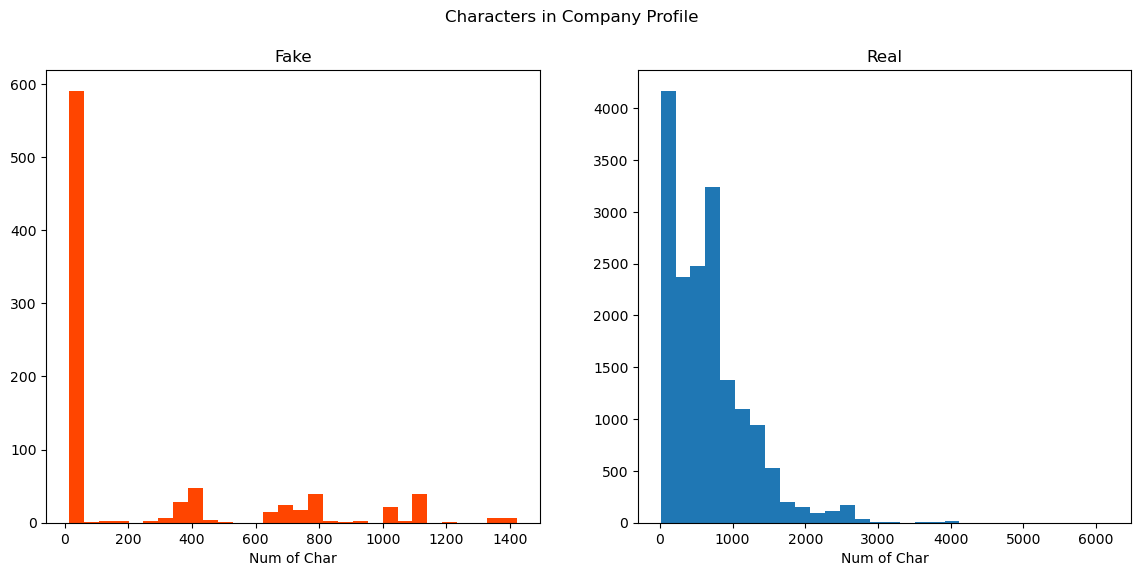

In [56]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(14, 6), dpi=100)

length1=df[df["fraudulent"]==1]['company_profile'].str.len()


ax1.hist(length1,bins = 30,color='orangered')
ax1.set_title('Fake')
ax1.set_xlabel('Num of Char')

length0=df[df["fraudulent"]==0]['company_profile'].str.len()


ax2.hist(length0, bins = 30)
ax2.set_title('Real')
ax2.set_xlabel('Num of Char')
fig.suptitle('Characters in Company Profile')
plt.show()

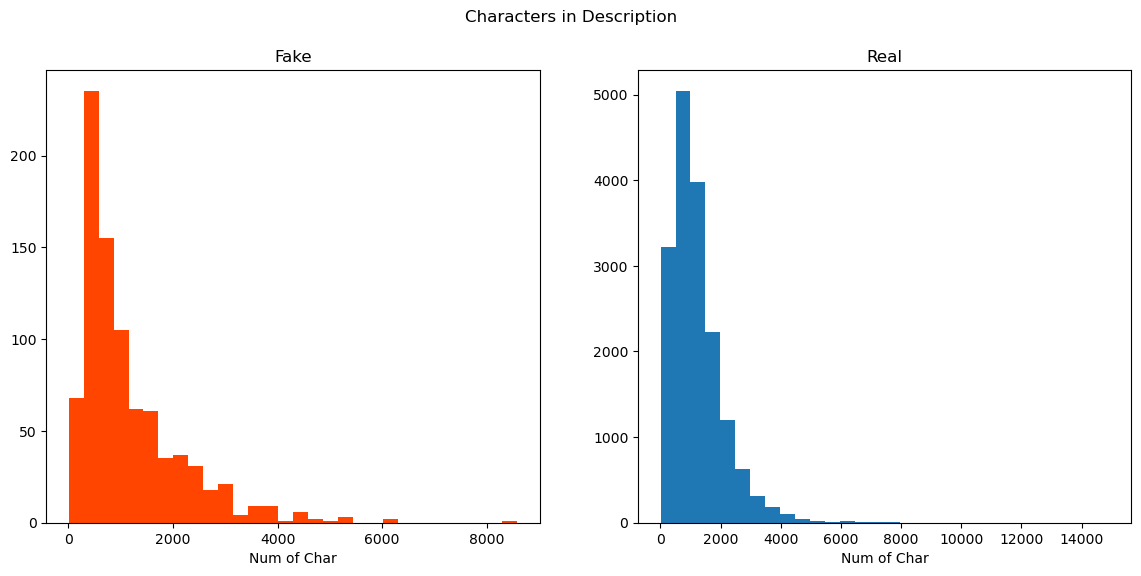

In [57]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(14, 6), dpi=100)

length1=df[df["fraudulent"]==1]['description'].str.len()


ax1.hist(length1,bins = 30,color='orangered')
ax1.set_title('Fake')
ax1.set_xlabel('Num of Char')

length0=df[df["fraudulent"]==0]['description'].str.len()


ax2.hist(length0, bins = 30)
ax2.set_title('Real')
ax2.set_xlabel('Num of Char')
fig.suptitle('Characters in Description')
plt.show()

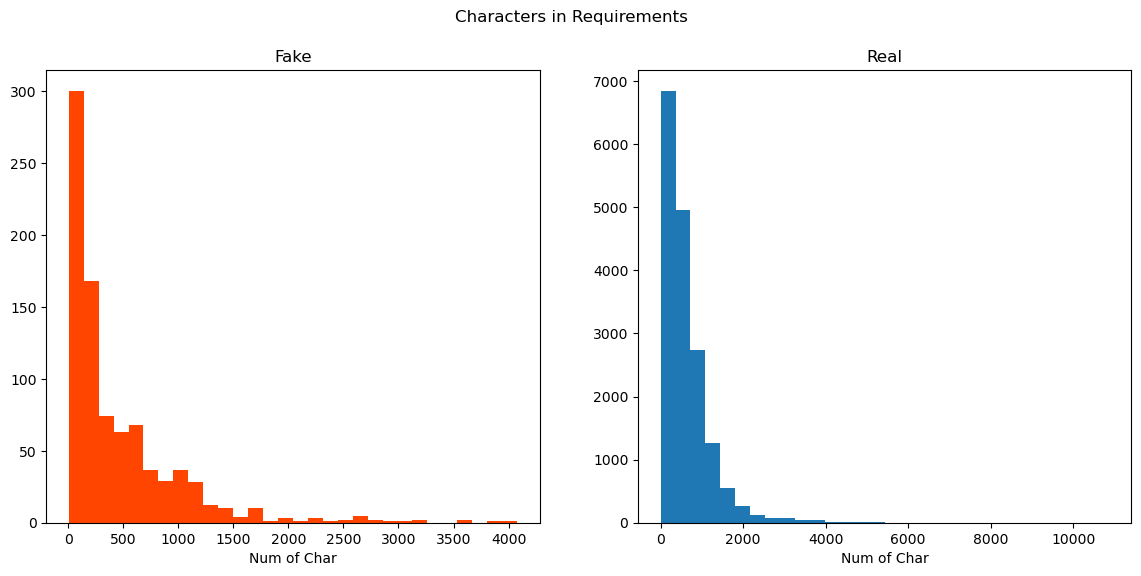

In [58]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(14, 6), dpi=100)

length1=df[df["fraudulent"]==1]['requirements'].str.len()


ax1.hist(length1,bins = 30,color='orangered')
ax1.set_title('Fake')
ax1.set_xlabel('Num of Char')

length0=df[df["fraudulent"]==0]['requirements'].str.len()


ax2.hist(length0, bins = 30)
ax2.set_title('Real')
ax2.set_xlabel('Num of Char')
fig.suptitle('Characters in Requirements')
plt.show()

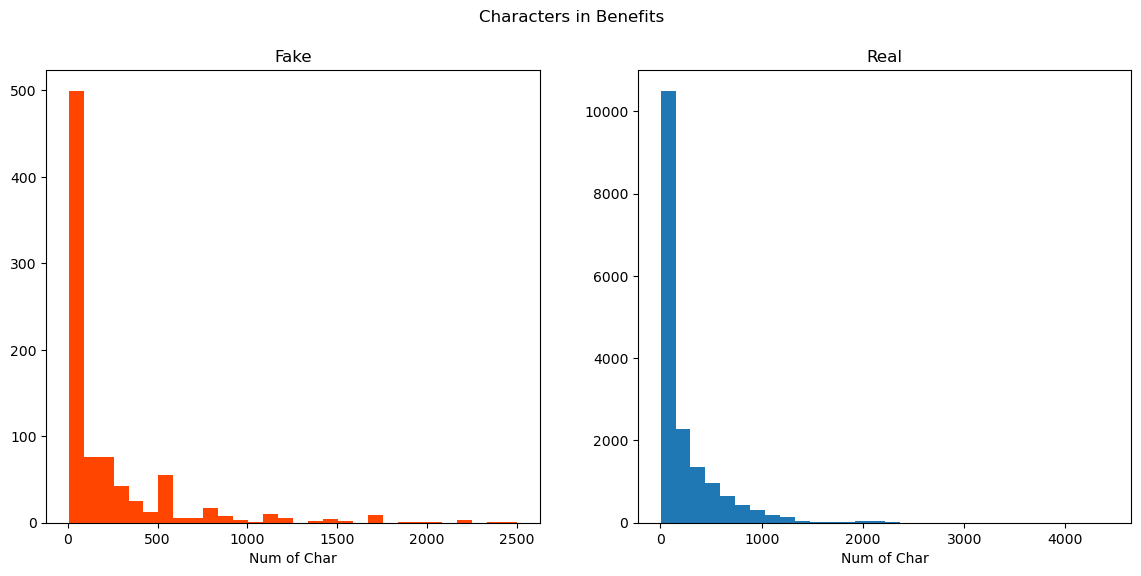

In [59]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(14, 6), dpi=100)

length1=df[df["fraudulent"]==1]['benefits'].str.len()


ax1.hist(length1,bins = 30,color='orangered')
ax1.set_title('Fake')
ax1.set_xlabel('Num of Char')

length0=df[df["fraudulent"]==0]['benefits'].str.len()


ax2.hist(length0, bins = 30)
ax2.set_title('Real')
ax2.set_xlabel('Num of Char')
fig.suptitle('Characters in Benefits')
plt.show()

<AxesSubplot:xlabel='telecommuting', ylabel='count'>

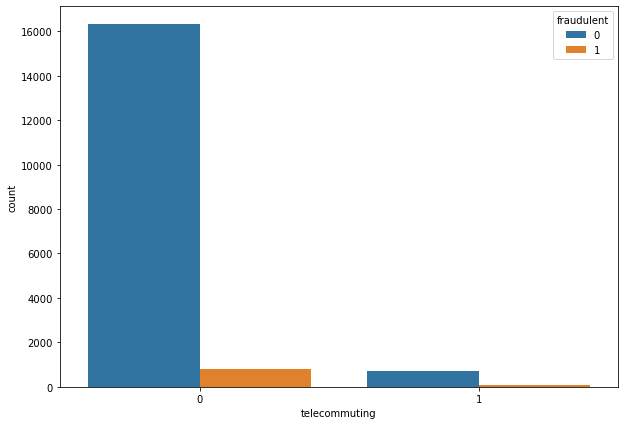

In [60]:
plt.figure(figsize=(10,7))
sns.countplot(x ="telecommuting", hue="fraudulent", data=df)

<AxesSubplot:xlabel='has_company_logo', ylabel='count'>

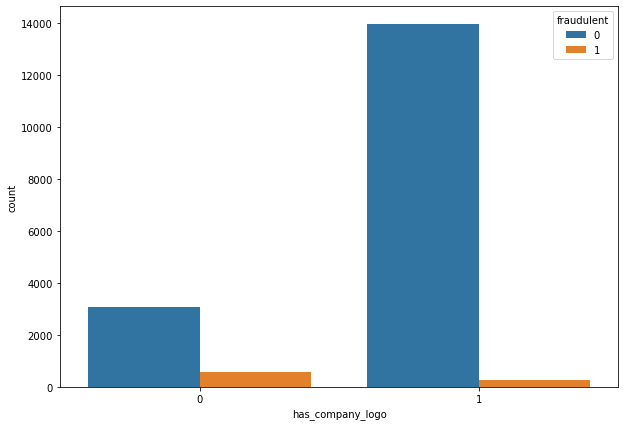

In [61]:
plt.figure(figsize=(10,7))
sns.countplot(x ="has_company_logo", hue="fraudulent", data=df)

<AxesSubplot:xlabel='has_questions', ylabel='count'>

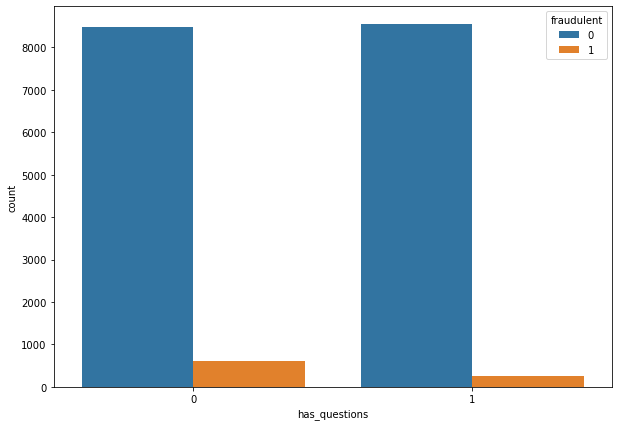

In [62]:
plt.figure(figsize=(10,7))
sns.countplot(x ="has_questions", hue="fraudulent", data=df)

In [ ]:
#We are not going to deal with text columns in this project
df=df.drop(['job_id','company_profile','description','requirements','benefits'],axis=1)

In [136]:
#Applying different machine learnng algorithms
from sklearn.model_selection import train_test_split

x=df.drop('fraudulent',axis=1)
y=df['fraudulent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [137]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [139]:
predictions=rfc.predict(x_test)

In [140]:
from sklearn.metrics import classification_report,confusion_matrix


In [141]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5111
           1       0.79      0.43      0.56       253

    accuracy                           0.97      5364
   macro avg       0.88      0.71      0.77      5364
weighted avg       0.96      0.97      0.96      5364



In [142]:
print(confusion_matrix(y_test,predictions))

[[5082   29]
 [ 143  110]]


In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
dtree = DecisionTreeClassifier()

In [145]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [147]:
predictions_tree = dtree.predict(x_test)

In [148]:
print(classification_report(y_test,predictions_tree))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5111
           1       0.64      0.43      0.52       253

    accuracy                           0.96      5364
   macro avg       0.81      0.71      0.75      5364
weighted avg       0.96      0.96      0.96      5364



In [149]:
print(confusion_matrix(y_test,predictions_tree))

[[5050   61]
 [ 143  110]]


In [150]:
from sklearn.linear_model import LogisticRegression

In [162]:
logmodel = LogisticRegression(max_iter=700)
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=700)

In [163]:
predictions_log = logmodel.predict(x_test)

In [164]:
print(classification_report(y_test,predictions_log))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      5111
           1       0.79      0.04      0.08       253

    accuracy                           0.95      5364
   macro avg       0.87      0.52      0.53      5364
weighted avg       0.95      0.95      0.93      5364



In [165]:
print(confusion_matrix(y_test,predictions))

[[5082   29]
 [ 143  110]]


In [166]:
from sklearn.neighbors import KNeighborsClassifier

In [167]:
knn = KNeighborsClassifier(n_neighbors=1)

In [168]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [169]:
predictions_knn = knn.predict(x_test)

In [170]:
print(classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5111
           1       0.39      0.61      0.48       253

    accuracy                           0.94      5364
   macro avg       0.68      0.78      0.72      5364
weighted avg       0.95      0.94      0.94      5364



In [171]:
print(confusion_matrix(y_test,predictions_knn))

[[4868  243]
 [  98  155]]


In [172]:
error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

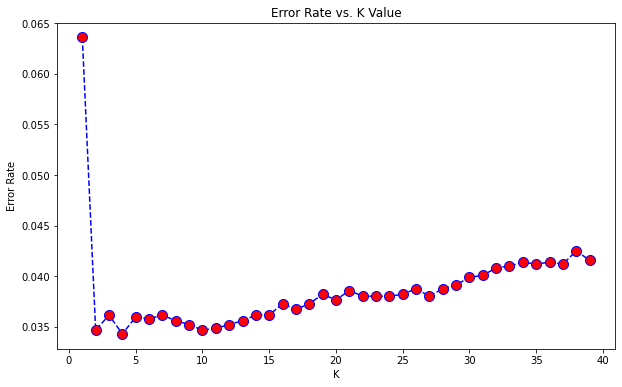

In [173]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [174]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(x_train,y_train)
predictions_knn = knn.predict(x_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,predictions_knn))
print('\n')
print(classification_report(y_test,predictions_knn))

WITH K=30


[[5090   21]
 [ 163   90]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5111
           1       0.81      0.36      0.49       253

    accuracy                           0.97      5364
   macro avg       0.89      0.68      0.74      5364
weighted avg       0.96      0.97      0.96      5364



In [175]:
from sklearn.preprocessing import MinMaxScaler

In [176]:
scaler = MinMaxScaler()

In [177]:
x_train = scaler.fit_transform(x_train)

In [178]:
x_test = scaler.transform(x_test)

In [179]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [181]:
x_train.shape

(12516, 30)

In [182]:
model = Sequential()



model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [184]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=600,
          validation_data=(x_test, y_test), verbose=1
          )

Epoch 1/600
392/392 [==============================] - 2s 3ms/step - loss: 0.2249 - val_loss: 0.1556
Epoch 2/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1555 - val_loss: 0.1478
Epoch 3/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1495 - val_loss: 0.1441
Epoch 4/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1462 - val_loss: 0.1417
Epoch 5/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1432 - val_loss: 0.1399
Epoch 6/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1411 - val_loss: 0.1384
Epoch 7/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1383 - val_loss: 0.1356
Epoch 8/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1369 - val_loss: 0.1353
Epoch 9/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1357 - val_loss: 0.1351
Epoch 10/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1348 - val_lo

392/392 [==============================] - 1s 2ms/step - loss: 0.1074 - val_loss: 0.1399
Epoch 82/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1076 - val_loss: 0.1363
Epoch 83/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1061 - val_loss: 0.1397
Epoch 84/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1062 - val_loss: 0.1376
Epoch 85/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1055 - val_loss: 0.1390
Epoch 86/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1056 - val_loss: 0.1394
Epoch 87/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1050 - val_loss: 0.1396
Epoch 88/600
392/392 [==============================] - 2s 4ms/step - loss: 0.1058 - val_loss: 0.1379
Epoch 89/600
392/392 [==============================] - 2s 4ms/step - loss: 0.1056 - val_loss: 0.1425
Epoch 90/600
392/392 [==============================] - 2s 5ms/step - loss: 0.1047 - val_loss: 

Epoch 161/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0910 - val_loss: 0.1594
Epoch 162/600
392/392 [==============================] - 1s 2ms/step - loss: 0.0911 - val_loss: 0.1589
Epoch 163/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0911 - val_loss: 0.1514
Epoch 164/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0906 - val_loss: 0.1520
Epoch 165/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0915 - val_loss: 0.1564
Epoch 166/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0911 - val_loss: 0.1532
Epoch 167/600
392/392 [==============================] - 1s 2ms/step - loss: 0.0911 - val_loss: 0.1560
Epoch 168/600
392/392 [==============================] - 1s 2ms/step - loss: 0.0921 - val_loss: 0.1532
Epoch 169/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0909 - val_loss: 0.1517
Epoch 170/600
392/392 [==============================] - 1s 3ms/step - lo

392/392 [==============================] - 2s 4ms/step - loss: 0.0855 - val_loss: 0.1691
Epoch 241/600
392/392 [==============================] - 2s 4ms/step - loss: 0.0853 - val_loss: 0.1723
Epoch 242/600
392/392 [==============================] - 2s 4ms/step - loss: 0.0852 - val_loss: 0.1682
Epoch 243/600
392/392 [==============================] - 2s 4ms/step - loss: 0.0868 - val_loss: 0.1738
Epoch 244/600
392/392 [==============================] - 1s 4ms/step - loss: 0.0854 - val_loss: 0.1685
Epoch 245/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0862 - val_loss: 0.1679
Epoch 246/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0860 - val_loss: 0.1693
Epoch 247/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0859 - val_loss: 0.1694
Epoch 248/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0857 - val_loss: 0.1674
Epoch 249/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0859 - v

392/392 [==============================] - 1s 3ms/step - loss: 0.0832 - val_loss: 0.1802
Epoch 320/600
392/392 [==============================] - 2s 4ms/step - loss: 0.0831 - val_loss: 0.1811
Epoch 321/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0826 - val_loss: 0.1774
Epoch 322/600
392/392 [==============================] - 2s 5ms/step - loss: 0.0825 - val_loss: 0.1776
Epoch 323/600
392/392 [==============================] - 2s 5ms/step - loss: 0.0826 - val_loss: 0.1827
Epoch 324/600
392/392 [==============================] - 2s 4ms/step - loss: 0.0827 - val_loss: 0.1790
Epoch 325/600
392/392 [==============================] - 1s 4ms/step - loss: 0.0825 - val_loss: 0.1817
Epoch 326/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0827 - val_loss: 0.1850
Epoch 327/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0826 - val_loss: 0.1803
Epoch 328/600
392/392 [==============================] - 1s 2ms/step - loss: 0.0822 - v

392/392 [==============================] - 1s 3ms/step - loss: 0.0804 - val_loss: 0.1952
Epoch 399/600
392/392 [==============================] - 1s 4ms/step - loss: 0.0808 - val_loss: 0.1862
Epoch 400/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0807 - val_loss: 0.1844
Epoch 401/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0799 - val_loss: 0.1838
Epoch 402/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0808 - val_loss: 0.1885
Epoch 403/600
392/392 [==============================] - 1s 2ms/step - loss: 0.0804 - val_loss: 0.1910
Epoch 404/600
392/392 [==============================] - 1s 2ms/step - loss: 0.0801 - val_loss: 0.1901
Epoch 405/600
392/392 [==============================] - 1s 2ms/step - loss: 0.0809 - val_loss: 0.1907
Epoch 406/600
392/392 [==============================] - 1s 2ms/step - loss: 0.0826 - val_loss: 0.1881
Epoch 407/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0804 - v

392/392 [==============================] - 1s 3ms/step - loss: 0.0790 - val_loss: 0.1916
Epoch 478/600
392/392 [==============================] - 1s 2ms/step - loss: 0.0792 - val_loss: 0.1925
Epoch 479/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0790 - val_loss: 0.1948
Epoch 480/600
392/392 [==============================] - 1s 2ms/step - loss: 0.0791 - val_loss: 0.1884
Epoch 481/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0798 - val_loss: 0.1934
Epoch 482/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0788 - val_loss: 0.1920
Epoch 483/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0802 - val_loss: 0.1938
Epoch 484/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0792 - val_loss: 0.1923
Epoch 485/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0799 - val_loss: 0.1943
Epoch 486/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0788 - v

392/392 [==============================] - 1s 3ms/step - loss: 0.0774 - val_loss: 0.1975
Epoch 557/600
392/392 [==============================] - 1s 2ms/step - loss: 0.0784 - val_loss: 0.1973
Epoch 558/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0778 - val_loss: 0.1993
Epoch 559/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0778 - val_loss: 0.1984
Epoch 560/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0788 - val_loss: 0.1994
Epoch 561/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0779 - val_loss: 0.1988
Epoch 562/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0777 - val_loss: 0.1973
Epoch 563/600
392/392 [==============================] - 1s 2ms/step - loss: 0.0788 - val_loss: 0.1981
Epoch 564/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0775 - val_loss: 0.2061
Epoch 565/600
392/392 [==============================] - 1s 3ms/step - loss: 0.0775 - v

In [185]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

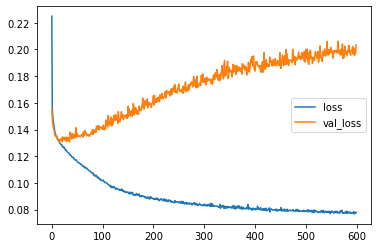

In [186]:
model_loss.plot()

In [251]:
# trained too much so now we will use early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [252]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [253]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=600,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
392/392 [==============================] - 3s 3ms/step - loss: 0.1931 - val_loss: 0.1573
Epoch 2/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1559 - val_loss: 0.1520
Epoch 3/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1507 - val_loss: 0.1481
Epoch 4/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1463 - val_loss: 0.1432
Epoch 5/600
392/392 [==============================] - 1s 2ms/step - loss: 0.1434 - val_loss: 0.1406
Epoch 6/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1406 - val_loss: 0.1371
Epoch 7/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1379 - val_loss: 0.1361
Epoch 8/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1365 - val_loss: 0.1339
Epoch 9/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1349 - val_loss: 0.1331
Epoch 10/600
392/392 [==============================] - 1s 2ms/step - loss: 0.1336 - val_lo

<AxesSubplot:>

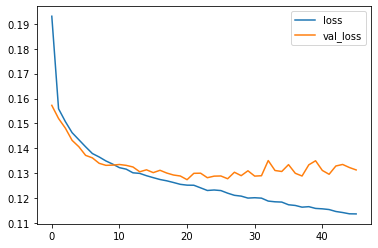

In [254]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [255]:
predictions_ann =  (model.predict(x_test) > 0.2).astype("int32")

In [256]:
print(classification_report(y_test,predictions_ann))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5111
           1       0.42      0.51      0.46       253

    accuracy                           0.94      5364
   macro avg       0.70      0.74      0.71      5364
weighted avg       0.95      0.94      0.95      5364



In [240]:
from tensorflow.keras.layers import Dropout

In [241]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [242]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=600,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
392/392 [==============================] - 2s 3ms/step - loss: 0.3378 - val_loss: 0.1708
Epoch 2/600
392/392 [==============================] - 1s 3ms/step - loss: 0.2112 - val_loss: 0.1603
Epoch 3/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1960 - val_loss: 0.1585
Epoch 4/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1916 - val_loss: 0.1541
Epoch 5/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1809 - val_loss: 0.1520
Epoch 6/600
392/392 [==============================] - 1s 3ms/step - loss: 0.1747 - val_loss: 0.1495
Epoch 7/600
392/392 [==============================] - 1s 4ms/step - loss: 0.1698 - val_loss: 0.1473
Epoch 8/600
392/392 [==============================] - 1s 4ms/step - loss: 0.1678 - val_loss: 0.1470
Epoch 9/600
392/392 [==============================] - 1s 4ms/step - loss: 0.1689 - val_loss: 0.1447
Epoch 10/600
392/392 [==============================] - 1s 4ms/step - loss: 0.1627 - val_lo

<AxesSubplot:>

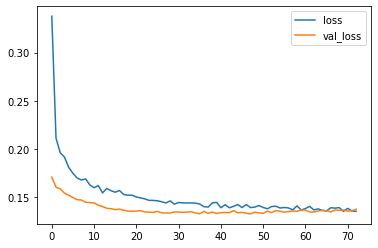

In [244]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()


In [249]:
predictions_drop = (model.predict(x_test) > 0.1).astype("int32")


In [250]:
print(classification_report(y_test,predictions_drop))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      5111
           1       0.36      0.55      0.44       253

    accuracy                           0.93      5364
   macro avg       0.67      0.75      0.70      5364
weighted avg       0.95      0.93      0.94      5364



In [257]:
# Now, we are going to resample our data
# under-sample
class_0=df[df['fraudulent']==0]
class_1=df[df['fraudulent']==1]

In [258]:
class_0.shape

(17014, 31)

In [259]:
class_1.shape

(866, 31)

In [260]:
class_0_under=class_0.sample(866)

In [261]:
test_under=pd.concat([class_0_under,class_1],axis=0)

In [262]:
x_under=pd.DataFrame(test_under.drop('fraudulent',axis=1))
y_under=pd.DataFrame(test_under['fraudulent'])

In [264]:
x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.3, random_state=101,stratify=y_under)

In [265]:
rfc_under=RandomForestClassifier()
rfc_under.fit(x_train,y_train.values.ravel())

RandomForestClassifier()

In [266]:
pred_under=rfc_under.predict(x_test)

In [267]:
print(classification_report(y_test,pred_under))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       260
           1       0.86      0.86      0.86       260

    accuracy                           0.86       520
   macro avg       0.86      0.86      0.86       520
weighted avg       0.86      0.86      0.86       520



In [268]:
print(confusion_matrix(y_test,pred_under))

[[224  36]
 [ 36 224]]


In [285]:
# over-sample
class_1_over=class_1.sample(17014,replace=True)

In [286]:
test_over=pd.concat([class_1_over,class_0],axis=0)

In [287]:
x_over=pd.DataFrame(test_over.drop('fraudulent',axis=1))
y_over=pd.DataFrame(test_over['fraudulent'])

In [288]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=101,stratify=y_over)

In [289]:
rfc_over=RandomForestClassifier()
rfc_over.fit(x_train,y_train.values.ravel())

RandomForestClassifier()

In [290]:
pred_over=rfc_over.predict(x_test)

In [291]:
print(classification_report(y_test,pred_over))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5104
           1       0.94      0.94      0.94      5105

    accuracy                           0.94     10209
   macro avg       0.94      0.94      0.94     10209
weighted avg       0.94      0.94      0.94     10209



In [292]:
print(confusion_matrix(y_test,pred_over))

[[4775  329]
 [ 288 4817]]


In [ ]:
#The last algorithm is the most effective